# Topic 1A 
**What time and space like interactions are most significant in multivariate systems?**

Setup
1.	Generate a 3D dataframe of times, variables, and their values, for a given timeseries of the first category of specifically discretised interactions.
2.	Write code to compute a list of cliques and their mutual information for a given 3D dataframe. The dataframe should contain the desired variables and their values over time. (for 3 variables, the output list should have length 14)
3.	Store the mutual informations as 2D matrix in a list, so a 3D dataframe.
4.	Plot <MI> vs dt, what result?

Import some test data

In [86]:
df = pd.read_csv("C:\\Users\\cyril\\Documents\\Personal\\Github\\PhD_1\\timeseries_test2.txt", sep='\t', header=0, usecols=lambda col: col != 'Time')  # choose between timeseries_test.txt and timeseries_test2.txt
df

,Variable1,Variable2,Variable3
0,-0.828995,-2.391641,0.648324
1,-0.560181,-0.899063,1.336592
2,0.747294,0.007866,-0.978997
3,0.610370,0.070471,0.394078
4,-0.020902,-0.675098,-0.455450
...,...,...,...
95,-0.469176,0.808365,-0.357011
96,-1.713135,-1.555869,-0.188912
97,1.353872,-0.285508,-0.685135
98,-0.114540,-1.313427,-0.311005


**Step 1**

In [60]:
# Import libraries
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [87]:
# Convert columns 1, 2, and 3 into lists of values
x_t = df.iloc[:, 0].tolist()
y_t = df.iloc[:, 1].tolist()
z_t = df.iloc[:, 2].tolist()

# Print the lists (optional)
print("x_t:", x_t)
print("y_t:", y_t)
print("z_t:", z_t)

x_t: [-0.8289950109220723, -0.5601810401969696, 0.7472936051232618, 0.6103702654334648, -0.0209015939641481, 0.117327383308782, 1.277664895788425, -0.5915713888358299, 0.5470973811700379, -0.202192652433894, -0.2176812032272203, 1.09877685198719, 0.8254163489880298, 0.8135096360006385, 1.305478807154329, 0.021003841632759, 0.6819529712949639, -0.310266756593456, 0.3241663524884421, -0.1301430543676845, 0.0969959649927181, 0.5951570254369136, -0.8182206832334725, 2.09238727568546, -1.006017381499702, -1.2141886127877322, 1.1581108735000678, 0.7916626939629359, 0.6241198170521551, 0.6283455092642799, -0.0122467728469146, -0.8972543714858315, 0.0758045581937263, -0.6771617115121117, 0.9751197334177512, -0.1470573815021386, -0.8254971967925115, -0.3213858416529934, 0.4129314542756243, -0.5637245528039747, -0.8222203955664315, 0.2436872114919123, 0.2449665711087227, -0.5069431753711298, -0.4710383056183228, 0.2320499373576363, -1.448084341497324, -1.4074637743765552, -0.718444221252436, -0.

In [2]:
# Generate random time series
length_test_time_series = 100

def random_time_series(length):
    return [random.random() for _ in range(length)]

N = length_test_time_series
x_t = random_time_series(N)
y_t = random_time_series(N)
z_t = random_time_series(N)
time = np.arange(0, N)

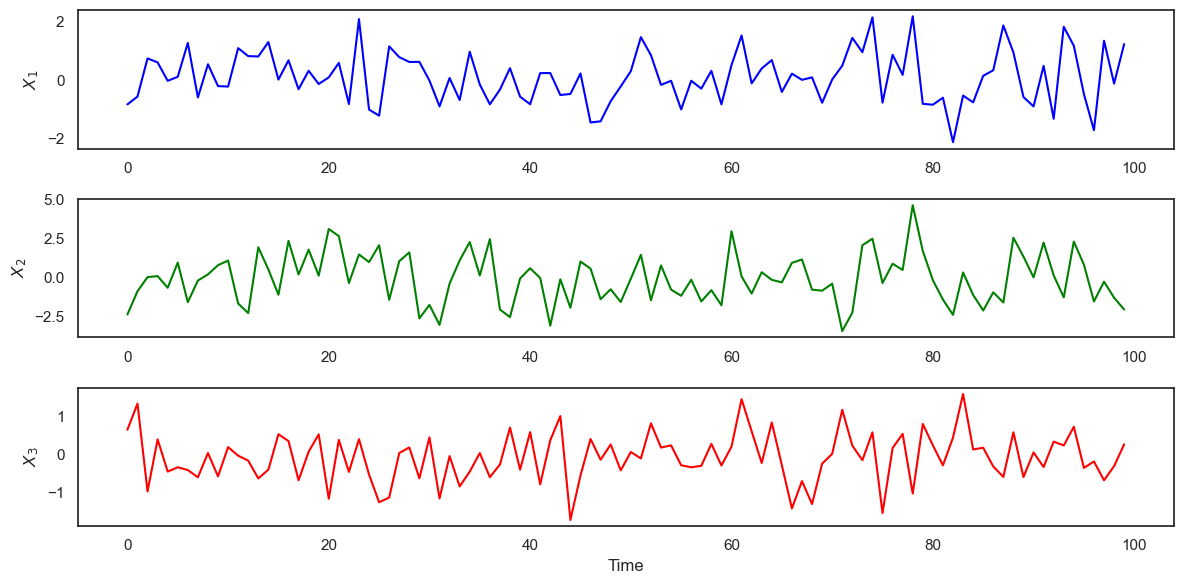

In [95]:
# Create the figure and subplots
plt.figure(figsize=(12, 6))  # Adjust the figure size to fit 3 plots

# First subplot for Series 1
plt.subplot(3, 1, 1)  # (3 rows, 1 column, first subplot)
plt.plot(time, x_t, label='Series 1', color='blue')
#plt.xlabel('Time')
plt.ylabel('$X_{1}$')
#plt.title('Series 1')
#plt.legend()

# Second subplot for Series 2
plt.subplot(3, 1, 2)  # (3 rows, 1 column, second subplot)
plt.plot(time, y_t, label='Series 2', color='green')
#plt.xlabel('Time')
plt.ylabel('$X_{2}$')
#plt.title('Series 2')
#plt.legend()

# Third subplot for Series 3
plt.subplot(3, 1, 3)  # (3 rows, 1 column, third subplot)
plt.plot(time, z_t, label='Series 3', color='red')
plt.xlabel('Time')
plt.ylabel('$X_{3}$')
#plt.title('Series 3')
#plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Divide into categories and generate dataframe

In [ ]:
# Reshape the DataFrame into a 3D array
# Step size (timesteps per slice)
step_size = 10

# Ensure the number of rows is divisible by the step size
num_rows = df.shape[0]
if num_rows % step_size != 0:
    raise ValueError("Number of rows in the DataFrame must be divisible by the step size.")

# Reshape into 3D array
reshaped_df = df.values.reshape(-1, step_size, df.shape[1])

# Convert the 3D array back to a DataFrame-like structure if needed
df_discretized = []
for i in range(reshaped_array.shape[0]):
    df_discretized.append(pd.DataFrame(reshaped_array[i], columns=df.columns))

In [96]:
time_window = 5

# Mask using the 99th and 1th percentile
df = df_discretized[time_window]
stacked_series = df.stack()
quantile_99 = stacked_series.quantile(0.99)
quantile_01 = stacked_series.quantile(0.01)
df[df > quantile_99] = quantile_99
df[df < quantile_01] = quantile_01

# Initialize an empty DataFrame to hold discretized values
discretized_time_series = pd.DataFrame()
max_BOLD = df.max().max()
min_BOLD = df.min().min()
desired_number_of_bins = 16
stepsize = (max_BOLD-min_BOLD)/desired_number_of_bins
bin_edges = np.arange(min_BOLD, max_BOLD, stepsize)

# Iterate over each column of 'df'
for col in df.columns:
    data = df[col].tolist()
    bin_numbers = np.digitize(data, bin_edges)
    
    # Create a DataFrame with the current column's discretized values
    col_df = pd.DataFrame({col: bin_numbers}, index=df.index)
    
    # Concatenate the new DataFrame along the columns axis
    discretized_time_series = pd.concat([discretized_time_series, col_df], axis=1)

First TEST the infotopo module to correctly obtain mutual informations

In [103]:
# Settings to use infotopo functions
dataset = np.array(discretized_time_series).T
work_on_transpose = False 
nb_of_values = 3
deformed_probability_mode = False
supervised_mode = False
forward_computation_mode = True
sampling_mode = 1

Nentropie = information_topo.simplicial_entropies_decomposition(dataset) 
Ninfomut = information_topo.simplicial_infomut_decomposition(Nentropie)
#Nfree_energy = information_topo.total_correlation_simplicial_lanscape(Nentropie)

Percent of tuples processed : 0


In [100]:
Ninfomut

{(10,): 1.584962500721156,
 (9,): 1.584962500721156,
 (8,): 0.9182958340544896,
 (7,): 1.584962500721156,
 (6,): 1.584962500721156,
 (5,): 1.584962500721156,
 (4,): 1.584962500721156,
 (3,): 0.9182958340544896,
 (2,): 0.9182958340544896,
 (1,): 0.9182958340544896,
 (9, 10): 1.584962500721156,
 (8, 10): 0.9182958340544896,
 (7, 10): 1.584962500721156,
 (6, 10): 1.584962500721156,
 (5, 10): 1.584962500721156,
 (4, 10): 1.584962500721156,
 (3, 10): 0.9182958340544896,
 (2, 10): 0.9182958340544896,
 (1, 10): 0.9182958340544896,
 (8, 9): 0.9182958340544896,
 (7, 9): 1.584962500721156,
 (6, 9): 1.584962500721156,
 (5, 9): 1.584962500721156,
 (4, 9): 1.584962500721156,
 (3, 9): 0.9182958340544896,
 (2, 9): 0.9182958340544896,
 (1, 9): 0.9182958340544896,
 (7, 8): 0.9182958340544896,
 (6, 8): 0.9182958340544896,
 (5, 8): 0.9182958340544896,
 (4, 8): 0.9182958340544896,
 (3, 8): 0.9182958340544896,
 (2, 8): 0.25162916738782304,
 (1, 8): 0.25162916738782304,
 (6, 7): 1.584962500721156,
 (5, 7): 